In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

import sys
sys.path.append('../src')
from data_load.csvs import get_asset_price_history
from strategies import WeeklyFNGDCA

sns.set_theme(style="whitegrid")


# Set experiment parameters

START = "2017-01-01"
END = "2022-05-08"
ASSET = "BTC"
WEEKLY_INVESTMENT = 100

# Collect BTC data

df = get_asset_price_history(ASSET, START, END)

In [3]:
df = df.assign(RSI=ta.RSI(df.Close).fillna(50))

Date
2017-01-09    50.000000
2017-01-10    50.000000
2017-01-11    50.000000
2017-01-12    50.000000
2017-01-13    50.000000
                ...    
2022-05-04    48.442447
2022-05-05    38.178099
2022-05-06    36.743960
2022-05-07    35.303110
2022-05-08    31.717780
Name: RSI, Length: 1946, dtype: float64

In [6]:
df = df.assign(relative_price_change=(df.Close - df.Close.rolling(window=30).mean())/df.Close.rolling(window=30).mean())
df = df.assign(relative_rsi=(df.RSI - 50) / 50)

df[["relative_price_change", "relative_rsi"]].corr()

,relative_price_change,relative_rsi
relative_price_change,1.000000,0.911042
relative_rsi,0.911042,1.000000


Text(0.5, 1.0, 'BTC price colored with RSI value')

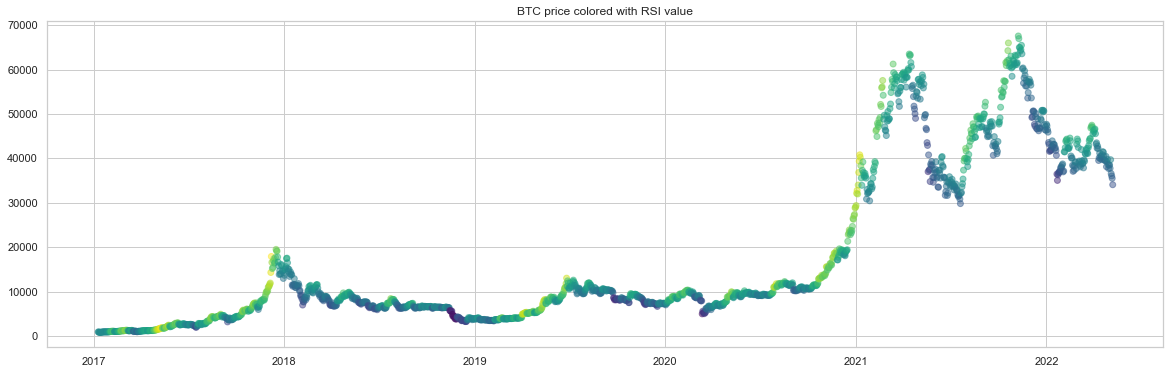

In [15]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(df.index, df.Close, c=df.RSI, alpha=0.5)  
ax.set_title(f"{ASSET} price colored with RSI value")

<AxesSubplot:xlabel='Date'>

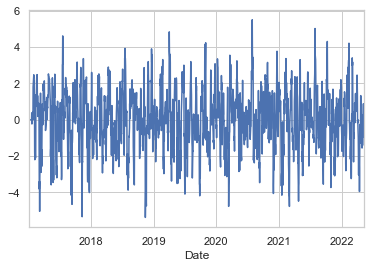

Text(0.5, 1.0, 'BTC price colored with RSI value')

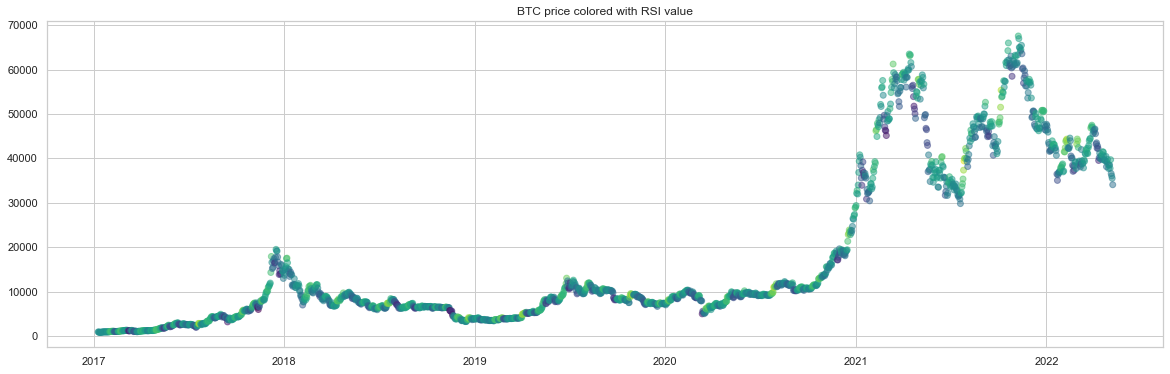

In [23]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(df.index, df.Close, c=df.RSI.diff().fillna(0).rolling(window=7).mean().fillna(0), alpha=0.5)  
ax.set_title(f"{ASSET} price colored with RSI value")